In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" Zero Fine Ver Newton-Raphson """
def f(x):
    return x**2 - 4

# 도함수 정의
def df(x):
    return 2*x

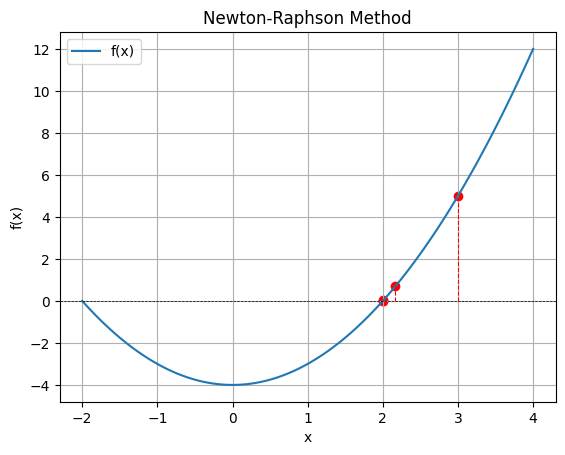

In [3]:
# init value
x0 = 3

# init iter num
iterations = 5

# plot graph 
x_vals = np.linspace(-2, 4, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

x_n = x0
for i in range(iterations):
    plt.scatter(x_n, f(x_n), color='red', marker='o')
    plt.plot([x_n, x_n], [0, f(x_n)], color='red', linestyle='--', linewidth=0.8)
    x_n = x_n - f(x_n) / df(x_n)

plt.title('Newton-Raphson Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

뉴턴 랩슨 메서드 결과 - 최적해: [3. 2.] 최적값: 9.0
경사하강법 결과 - 최적해: [4.93651367e-07 3.29100911e-07] 최적값: -3.999999999999648


AttributeError: 'tuple' object has no attribute 'size'

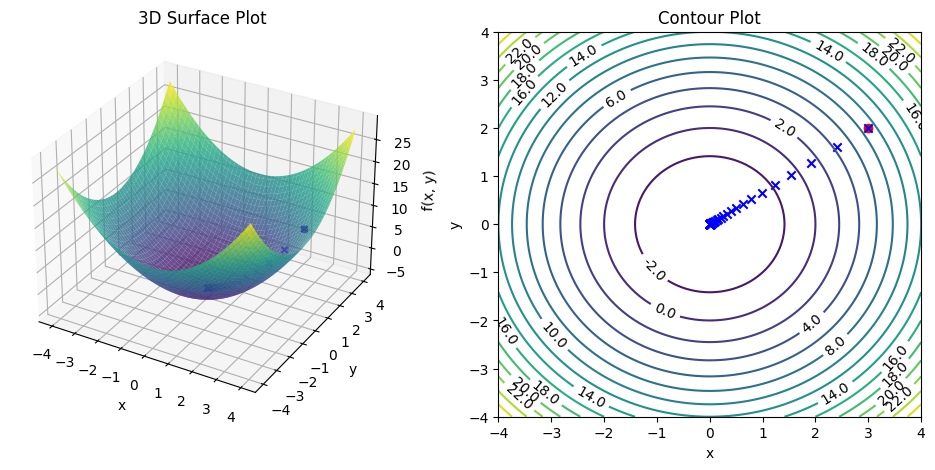

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**2 + y**2 - 4

def df(x, y):
    return np.array([2*x, 2*y])

def d2f(x, y):
    return np.array([[2, 0], [0, 2]])

def newton_raphson_optimization(f, df, d2f, initial_guess, tol=1e-6, max_iter=100):
    x_optimal_history = []
    f_optimal_history = []

    x_opt = np.array(initial_guess)
    iter_count = 0

    while iter_count < max_iter:
        df_val = df(*x_opt)
        d2f_val = d2f(*x_opt)

        if np.linalg.norm(df_val) < tol:
            break

        x_optimal_history.append(x_opt)
        f_optimal_history.append(f(*x_opt))

        x_opt = x_opt - np.linalg.solve(d2f_val, df_val)
        iter_count += 1

    return np.array(x_optimal_history), np.array(f_optimal_history)

def gradient_descent_optimization(f, df, initial_guess, learning_rate=0.1, tol=1e-6, max_iter=100):
    x_optimal_history = []
    f_optimal_history = []

    x_opt = np.array(initial_guess)
    iter_count = 0

    while iter_count < max_iter:
        df_val = df(*x_opt)

        if np.linalg.norm(df_val) < tol:
            break

        x_optimal_history.append(x_opt)
        f_optimal_history.append(f(*x_opt))

        x_opt = x_opt - learning_rate * df_val
        iter_count += 1

    return np.array(x_optimal_history), np.array(f_optimal_history)

# 초기 추정값
initial_guess = [3.0, 2.0]

# 최적화 함수 호출
newton_optimal_history, newton_f_history = newton_raphson_optimization(f, df, d2f, initial_guess)
gd_optimal_history, gd_f_history = gradient_descent_optimization(f, df, initial_guess)

# 결과 출력
print("뉴턴 랩슨 메서드 결과 - 최적해:", newton_optimal_history[-1], "최적값:", newton_f_history[-1])
print("경사하강법 결과 - 최적해:", gd_optimal_history[-1], "최적값:", gd_f_history[-1])

# 시각화
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

fig = plt.figure(figsize=(12, 5))

# 3D Surface Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, label='f(x, y) = x^2 + y^2 - 4')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D Surface Plot')

# Contour Plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.clabel(contour, colors='black', fmt='%1.1f', fontsize=10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot')

# Plot Optimization Paths
ax1.scatter(newton_optimal_history[:, 0], newton_optimal_history[:, 1], newton_f_history, color='red', marker='o', label='Newton-Raphson')
ax2.scatter(newton_optimal_history[:, 0], newton_optimal_history[:, 1], color='red', marker='o', label='Newton-Raphson')

ax1.scatter(gd_optimal_history[:, 0], gd_optimal_history[:, 1], gd_f_history, color='blue', marker='x', label='Gradient Descent')
ax2.scatter(gd_optimal_history[:, 0], gd_optimal_history[:, 1], color='blue', marker='x', label='Gradient Descent')

ax1.legend()
ax2.legend()

plt.suptitle('Comparison of Newton-Raphson and Gradient Descent for Multivariate Optimization')
plt.show()


Newton-Raphson Method Result - Optimal Point: [3. 2.] Optimal Value: 9.0
Gradient Descent Result - Optimal Point: [4.93651367e-07 3.29100911e-07] Optimal Value: -3.999999999999648


AttributeError: 'tuple' object has no attribute 'size'

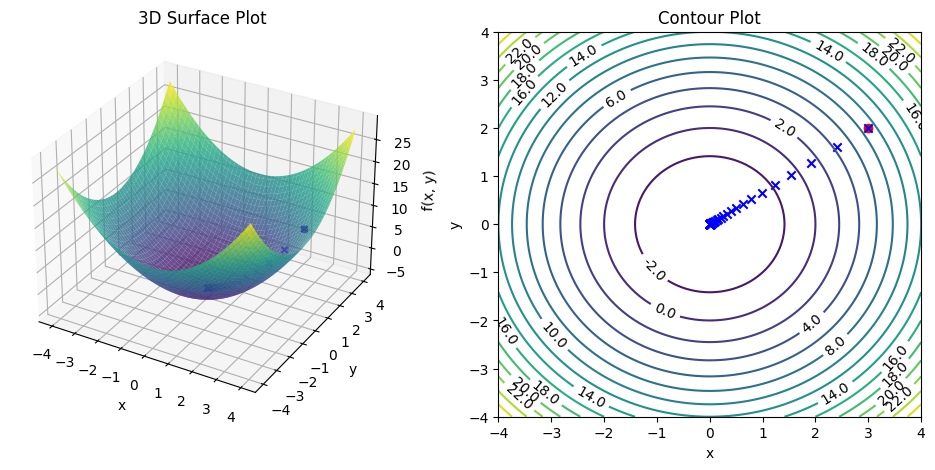

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def multivariate_function(x):
    return x[0]**2 + x[1]**2 - 4

def gradient(x):
    return np.array([2 * x[0], 2 * x[1]])

def hessian(x):
    return np.array([[2, 0], [0, 2]])

def newton_raphson_optimization(f, df, d2f, initial_guess, tol=1e-6, max_iter=100):
    x_optimal_history = []
    f_optimal_history = []

    x_opt = np.array(initial_guess)
    iter_count = 0

    while iter_count < max_iter:
        df_val = df(x_opt)
        d2f_val = d2f(x_opt)

        if np.linalg.norm(df_val) < tol:
            break

        x_optimal_history.append(x_opt)
        f_optimal_history.append(f(x_opt))

        x_opt = x_opt - np.linalg.solve(d2f_val, df_val)
        iter_count += 1

    return np.array(x_optimal_history), np.array(f_optimal_history)

def gradient_descent_optimization(f, df, initial_guess, learning_rate=0.1, tol=1e-6, max_iter=100):
    x_optimal_history = []
    f_optimal_history = []

    x_opt = np.array(initial_guess)
    iter_count = 0

    while iter_count < max_iter:
        df_val = df(x_opt)

        if np.linalg.norm(df_val) < tol:
            break

        x_optimal_history.append(x_opt)
        f_optimal_history.append(f(x_opt))

        x_opt = x_opt - learning_rate * df_val
        iter_count += 1

    return np.array(x_optimal_history), np.array(f_optimal_history)

# Initial guess
initial_guess = [3.0, 2.0]

# Optimization using Newton-Raphson method
newton_optimal_history, newton_f_history = newton_raphson_optimization(multivariate_function, gradient, hessian, initial_guess)

# Optimization using Gradient Descent
gradient_descent_optimal_history, gradient_descent_f_history = gradient_descent_optimization(multivariate_function, gradient, initial_guess)

# Results
print("Newton-Raphson Method Result - Optimal Point:", newton_optimal_history[-1], "Optimal Value:", newton_f_history[-1])
print("Gradient Descent Result - Optimal Point:", gradient_descent_optimal_history[-1], "Optimal Value:", gradient_descent_f_history[-1])

# Visualization
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = multivariate_function([X, Y])

fig = plt.figure(figsize=(12, 5))

# 3D Surface Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, label='f(x, y) = x^2 + y^2 - 4')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D Surface Plot')

# Contour Plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.clabel(contour, colors='black', fmt='%1.1f', fontsize=10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot')

# Plot Optimization Paths
ax1.scatter(newton_optimal_history[:, 0], newton_optimal_history[:, 1], newton_f_history, color='red', marker='o', label='Newton-Raphson')
ax2.scatter(newton_optimal_history[:, 0], newton_optimal_history[:, 1], color='red', marker='o', label='Newton-Raphson')

ax1.scatter(gradient_descent_optimal_history[:, 0], gradient_descent_optimal_history[:, 1], gradient_descent_f_history, color='blue', marker='x', label='Gradient Descent')
ax2.scatter(gradient_descent_optimal_history[:, 0], gradient_descent_optimal_history[:, 1], color='blue', marker='x', label='Gradient Descent')

ax1.legend()
ax2.legend()

plt.suptitle('Comparison of Newton-Raphson and Gradient Descent for Multivariate Optimization')
plt.show()


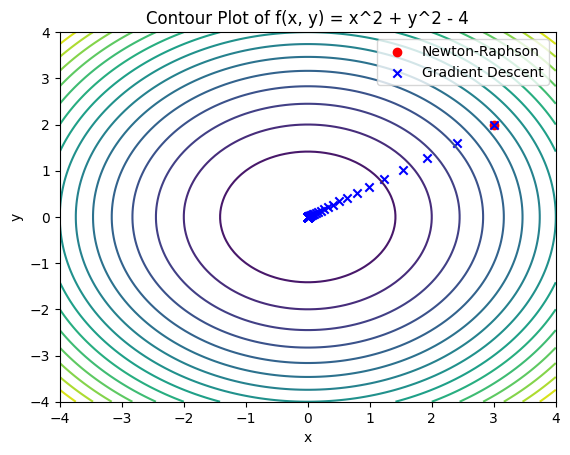

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def multivariate_function(x):
    return x[0]**2 + x[1]**2 - 4

def gradient(x):
    return np.array([2 * x[0], 2 * x[1]])

def hessian(x):
    return np.array([[2, 0], [0, 2]])

def newton_raphson_optimization(f, df, d2f, initial_guess, tol=1e-6, max_iter=100):
    x_optimal_history = []
    f_optimal_history = []

    x_opt = np.array(initial_guess)
    iter_count = 0

    while iter_count < max_iter:
        df_val = df(x_opt)
        d2f_val = d2f(x_opt)

        if np.linalg.norm(df_val) < tol:
            break

        x_optimal_history.append(x_opt)
        f_optimal_history.append(f(x_opt))

        x_opt = x_opt - np.linalg.solve(d2f_val, df_val)
        iter_count += 1

    return np.array(x_optimal_history), np.array(f_optimal_history)

def gradient_descent_optimization(f, df, initial_guess, learning_rate=0.1, tol=1e-6, max_iter=100):
    x_optimal_history = []
    f_optimal_history = []

    x_opt = np.array(initial_guess)
    iter_count = 0

    while iter_count < max_iter:
        df_val = df(x_opt)

        if np.linalg.norm(df_val) < tol:
            break

        x_optimal_history.append(x_opt)
        f_optimal_history.append(f(x_opt))

        x_opt = x_opt - learning_rate * df_val
        iter_count += 1

    return np.array(x_optimal_history), np.array(f_optimal_history)

# Initial guess
initial_guess = [3.0, 2.0]

# Optimization using Newton-Raphson method
newton_optimal_history, newton_f_history = newton_raphson_optimization(multivariate_function, gradient, hessian, initial_guess)

# Optimization using Gradient Descent
gradient_descent_optimal_history, gradient_descent_f_history = gradient_descent_optimization(multivariate_function, gradient, initial_guess)

# Visualization
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = multivariate_function([X, Y])

# Contour Plot
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y) = x^2 + y^2 - 4')

# Plot Optimization Paths
plt.scatter(newton_optimal_history[:, 0], newton_optimal_history[:, 1], color='red', marker='o', label='Newton-Raphson')
plt.scatter(gradient_descent_optimal_history[:, 0], gradient_descent_optimal_history[:, 1], color='blue', marker='x', label='Gradient Descent')

plt.legend()
plt.show()


AttributeError: 'tuple' object has no attribute 'size'

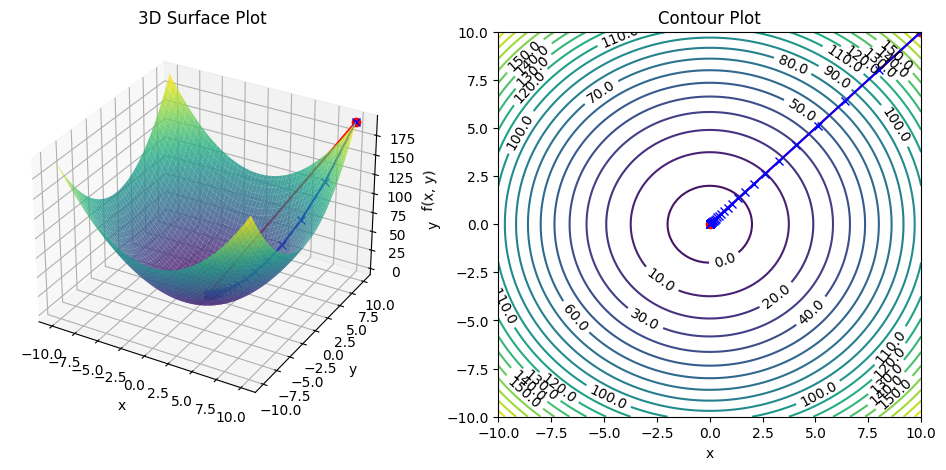

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def multivariate_function(x):
    return x[0]**2 + x[1]**2 - 4

def gradient(x):
    return np.array([2 * x[0], 2 * x[1]])

def hessian(x):
    return np.array([[2, 0], [0, 2]])

def newton_raphson_optimization(f, df, d2f, initial_guess, tol=1e-6, max_iter=1000):
    x_optimal_history = []

    x_opt = np.array(initial_guess)
    iter_count = 0

    while iter_count < max_iter:
        df_val = df(x_opt)
        d2f_val = d2f(x_opt)

        x_optimal_history.append(x_opt)

        if np.linalg.norm(df_val) < tol:
            break

        x_opt = x_opt - np.linalg.solve(d2f_val, df_val)
        iter_count += 1

    return np.array(x_optimal_history)

def gradient_descent_optimization(f, df, initial_guess, learning_rate=0.1, tol=1e-6, max_iter=1000):
    x_optimal_history = []

    x_opt = np.array(initial_guess)
    iter_count = 0

    while iter_count < max_iter:
        df_val = df(x_opt)

        x_optimal_history.append(x_opt)

        if np.linalg.norm(df_val) < tol:
            break

        x_opt = x_opt - learning_rate * df_val
        iter_count += 1

    return np.array(x_optimal_history)

# Initial guess
initial_guess = [10.0, 10.0]

# Optimization using Newton-Raphson method
newton_optimal_history = newton_raphson_optimization(multivariate_function, gradient, hessian, initial_guess)

# Optimization using Gradient Descent
gradient_descent_optimal_history = gradient_descent_optimization(multivariate_function, gradient, initial_guess)

# Visualization
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = multivariate_function([X, Y])

fig = plt.figure(figsize=(12, 5))

# 3D Surface Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, label='f(x, y) = 10*x^2 + 1000*y^2 - 4')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D Surface Plot')

# Contour Plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.clabel(contour, colors='black', fmt='%1.1f', fontsize=10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot')

# Plot Optimization Paths
ax1.plot(newton_optimal_history[:, 0], newton_optimal_history[:, 1], multivariate_function(newton_optimal_history.T), color='red', marker='o', label='Newton-Raphson')
ax2.plot(newton_optimal_history[:, 0], newton_optimal_history[:, 1], color='red', marker='o', label='Newton-Raphson')

ax1.plot(gradient_descent_optimal_history[:, 0], gradient_descent_optimal_history[:, 1], multivariate_function(gradient_descent_optimal_history.T), color='blue', marker='x', label='Gradient Descent')
ax2.plot(gradient_descent_optimal_history[:, 0], gradient_descent_optimal_history[:, 1], color='blue', marker='x', label='Gradient Descent')

ax1.legend()
ax2.legend()

plt.suptitle('Comparison of Newton-Raphson and Gradient Descent for Multivariate Optimization')
plt.show()
